<a href="https://colab.research.google.com/github/sanketpatil51/taffic_sign/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzip the file

In [ ]:
import zipfile
import os

zip_file_path = "/content/drive/MyDrive/data/traffic.zip"
extracted_folder_path = "/content/drive/MyDrive/data/data"

# Check if the zip file exists
if os.path.exists(zip_file_path):
    # Extract the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder_path)
    print("Extraction complete.")
else:
    print("Zip file not found at the specified path.")


Extraction complete.


Import the data

In [5]:
import os
import cv2

data = list()
labels = list()
images = list()

folder_path = r"/content/drive/MyDrive/data/data"
folder_list = os.listdir(folder_path)

for folder in folder_list:
    particular_folder_path = os.path.join(folder_path, folder)
    img_list_from_particular_folder = os.listdir(particular_folder_path)

    for i in img_list_from_particular_folder:
        img_path = os.path.join(particular_folder_path, i)
        img = cv2.imread(img_path)
        img

        img_resize = cv2.resize(img, (32, 32), interpolation=cv2.INTER_LINEAR)

        data.append(img_resize)
        labels.append(folder)

    print("Done:", folder)




Done: Ahead only
Done: Beware of icesnow
Done: Bicycles crossing
Done: Bumpy road
Done: Children crossing
Done: Dangerous curve to the left
Done: Dangerous curve to the right
Done: Double curve
Done: End of all speed and passing limits
Done: End of no passing by vechiles over 3.5 metric tons
Done: End of no passing
Done: End of speed limit (80kmh)
Done: General caution
Done: Go straight or left
Done: Go straight or right
Done: Keep left
Done: Keep right
Done: No entry
Done: No passing for vechiles over 3.5 metric tons
Done: No passing
Done: No vechiles
Done: Pedestrians
Done: Priority road
Done: Right-of-way at the next intersection
Done: Road narrows on the right
Done: Road work
Done: Roundabout mandatory
Done: Slippery road
Done: Speed limit (100kmh)
Done: Speed limit (120kmh)
Done: Speed limit (20kmh)
Done: Speed limit (30kmh)
Done: Speed limit (50kmh)
Done: Speed limit (60kmh)
Done: Speed limit (70kmh)
Done: Speed limit (80kmh)
Done: Stop
Done: Traffic signals
Done: Turn left ahead

Split the train test

In [6]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


data = np.array(data)
labels = np.array(labels)


label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_classes = len(np.unique(labels_encoded))
labels_one_hot = np.eye(num_classes)[labels_encoded]

X_train, X_test, y_train, y_test = train_test_split(data, labels_one_hot, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (26076, 32, 32, 3)
X_test shape: (6519, 32, 32, 3)
y_train shape: (26076, 42)
y_test shape: (6519, 42)


Import the require library

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

Data Augmentation

In [25]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

dataGen.fit(X_train)


batches= dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)

Model

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam


model = Sequential()


model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(60, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(500, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 60)        4560      
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 60)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                 

In [27]:

batch_size_val = 32
epochs_val = 10

# Fit the model
history = model.fit_generator(dataGen.flow(X_train/255, y_train, batch_size=batch_size_val),
                              steps_per_epoch=len(X_train) // batch_size_val,
                              epochs=epochs_val,
                              validation_data=(X_test/255, y_test),
                              shuffle=True)

Epoch 1/10


<ipython-input-27-06a723b884cd>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(dataGen.flow(X_train/255, y_train, batch_size=batch_size_val),


814/814 [==============================] - 22s 25ms/step - loss: 1.5819 - accuracy: 0.5248 - val_loss: 0.2874 - val_accuracy: 0.9104
Epoch 2/10
814/814 [==============================] - 19s 24ms/step - loss: 0.4177 - accuracy: 0.8687 - val_loss: 0.1162 - val_accuracy: 0.9656
Epoch 3/10
814/814 [==============================] - 19s 24ms/step - loss: 0.2267 - accuracy: 0.9299 - val_loss: 0.0568 - val_accuracy: 0.9842
Epoch 4/10
814/814 [==============================] - 20s 25ms/step - loss: 0.1711 - accuracy: 0.9466 - val_loss: 0.0386 - val_accuracy: 0.9890
Epoch 5/10
814/814 [==============================] - 21s 25ms/step - loss: 0.1298 - accuracy: 0.9589 - val_loss: 0.0305 - val_accuracy: 0.9922
Epoch 6/10
814/814 [==============================] - 19s 23ms/step - loss: 0.1206 - accuracy: 0.9661 - val_loss: 0.0262 - val_accuracy: 0.9936
Epoch 7/10
814/814 [==============================] - 20s 25ms/step - loss: 0.1010 - accuracy: 0.9689 - val_loss: 0.0302 - val_accuracy: 0.9899
Epo

Testing

1/1 [==============================] - 0s 73ms/step
Predicted class index: 36
Predicted class label: Stop


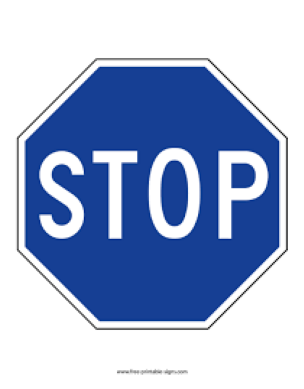

In [28]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/data/stop.png"
img = cv2.imread(file_path)

img_resize = cv2.resize(img, (32, 32), interpolation=cv2.INTER_LINEAR)


img_norm = img_resize/255
img_expanded = np.expand_dims(img_norm, axis=0)


prediction = model.predict(img_expanded)
predicted_class_index = np.argmax(prediction[0])


label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]


print("Predicted class index:", predicted_class_index)
print("Predicted class label:", predicted_class_label)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')
plt.show()